# **Housing in Brazil 🇧🇷**

In [31]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## **Import and Prepare data**

In [32]:
# Read the CSV with dollar sign and commas
df1 = pd.read_csv('brasil-real-estate-1.csv', encoding='latin1')
df1.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [33]:
df1.drop(df1.columns[0], axis=1, inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   property_type            12834 non-null  object
 1   place_with_parent_names  12834 non-null  object
 2   region                   12834 non-null  object
 3   lat-lon                  11551 non-null  object
 4   area_m2                  12834 non-null  int64 
 5   price_usd                12834 non-null  object
dtypes: int64(1), object(5)
memory usage: 601.7+ KB


In [34]:
df1.dropna(inplace=True)

df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11551 entries, 0 to 12833
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   property_type            11551 non-null  object
 1   place_with_parent_names  11551 non-null  object
 2   region                   11551 non-null  object
 3   lat-lon                  11551 non-null  object
 4   area_m2                  11551 non-null  int64 
 5   price_usd                11551 non-null  object
dtypes: int64(1), object(5)
memory usage: 631.7+ KB


### **Task 1.5.3: Use the "lat-lon" column to create two separate columns in df1: "lat" and "lon". Make sure that the data type for these new columns is **float.****

In [35]:
df1[["lat", "lon"]] = df1["lat-lon"].str.split(",", expand=True).astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227


### **Task 1.5.4: Use the "place_with_parent_names" column to create a "state" column for df1. (Note that the state name always appears after "|Brasil|" in each string.)**

In [36]:
df1["state"] = df1["place_with_parent_names"].str.split("|", expand=True)[2]
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",-9.654955,-35.700227,Alagoas


### **Task 1.5.5: Transform the "price_usd" column of df1 so that all values are floating-point numbers instead of strings.**

In [37]:
df1["price_usd"] = df1["price_usd"].str.replace(r"[\$,]", "", regex=True).astype(float)
df1.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,lat,lon,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,81133.37,-9.643093,-35.704840,Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,101416.71,-9.654955,-35.700227,Alagoas


### **Task 1.5.6: Drop the "lat-lon" and "place_with_parent_names" columns from df1.**

In [38]:
df1.drop(columns=["lat-lon", "place_with_parent_names"], inplace=True)
df1.head()

,property_type,region,area_m2,price_usd,lat,lon,state
0,apartment,Northeast,110,187230.85,-9.644305,-35.708814,Alagoas
1,apartment,Northeast,65,81133.37,-9.643093,-35.704840,Alagoas
2,house,Northeast,211,154465.45,-9.622703,-35.729795,Alagoas
3,apartment,Northeast,99,146013.20,-9.622837,-35.719556,Alagoas
4,apartment,Northeast,55,101416.71,-9.654955,-35.700227,Alagoas


**Now that you have cleaned data/brasil-real-estate-1.csv and created df1, you are going to import and clean the data from the second file, brasil-real-estate-2.csv.**

### **Task 1.5.7: Import the CSV file brasil-real-estate-2.csv into the DataFrame df2.**

In [39]:
df2 = pd.read_csv("brasil-real-estate-2.csv", encoding="latin2")
df2.drop(df2.columns[0], axis=1, inplace=True)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [40]:
df2.info()

df2.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12833 non-null  object 
 1   state          12833 non-null  object 
 2   region         12833 non-null  object 
 3   lat            12833 non-null  float64
 4   lon            12833 non-null  float64
 5   area_m2        11293 non-null  float64
 6   price_brl      12833 non-null  float64
dtypes: float64(4), object(3)
memory usage: 701.9+ KB


,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


### **Task 1.5.8: Use the "price_brl" column to create a new column named "price_usd". (Keep in mind that, when this data was collected in 2015 and 2016, a US dollar cost 3.19 Brazilian reals.)**

In [41]:
df2["price_usd"] = df2["price_brl"] / 3.19
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


### **Task 1.5.9: Drop the "price_brl" column from df2, as well as any rows that have NaN values.**

In [42]:
df2.dropna(inplace=True)
#df2.drop(columns="price_brl", inplace=True)
df2.head()

,property_type,state,region,lat,lon,area_m2,price_brl,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36,145495.097179


**OK! Now that you've cleaned the data from both CSV files and created df1 and df2, it's time to combine them into a single DataFrame.**

### **Task 1.5.10: Concatenate df1 and df2 to create a new DataFrame named df.**

In [43]:
df = pd.concat([df1, df2], axis=0)
#df.head()
print("df shape:", df.shape)

df shape: (22844, 8)


## **Explore**

**It's time to start exploring your data. In this section, you'll use your new data visualization skills to learn more about the regional differences in the Brazilian real estate market.**

In [46]:
fig = px.scatter_mapbox(
    df,
    lat=df["lat"],
    lon=df["lon"],
    center={"lat": -14.2, "lon": -51.9},  # Map will be centered on Brazil
    width=600,
    height=600,
    hover_data=["price_usd"],  # Display price when hovering mouse over house
)
fig.update_layout(mapbox_style="open-street-map")
fig.show();

### **Task 1.5.11: Use the describe method to create a DataFrame summary_stats with the summary statistics for the "area_m2" and "price_usd" columns.**

In [47]:
summary_stats = df[["area_m2", "price_usd"]].describe()
summary_stats

,area_m2,price_usd
count,22844.000000,22844.000000
mean,115.020224,194987.315480
std,47.742932,103617.682978
min,53.000000,74892.340000
25%,76.000000,113898.770000
50%,103.000000,165697.555000
75%,142.000000,246900.880878
max,252.000000,525659.717868


### **Task 1.5.12: Create a histogram of "price_usd". Make sure that the x-axis has the label "Price [USD]", the y-axis has the label "Frequency", and the plot has the title "Distribution of Home Prices". Use Matplotlib (plt).**

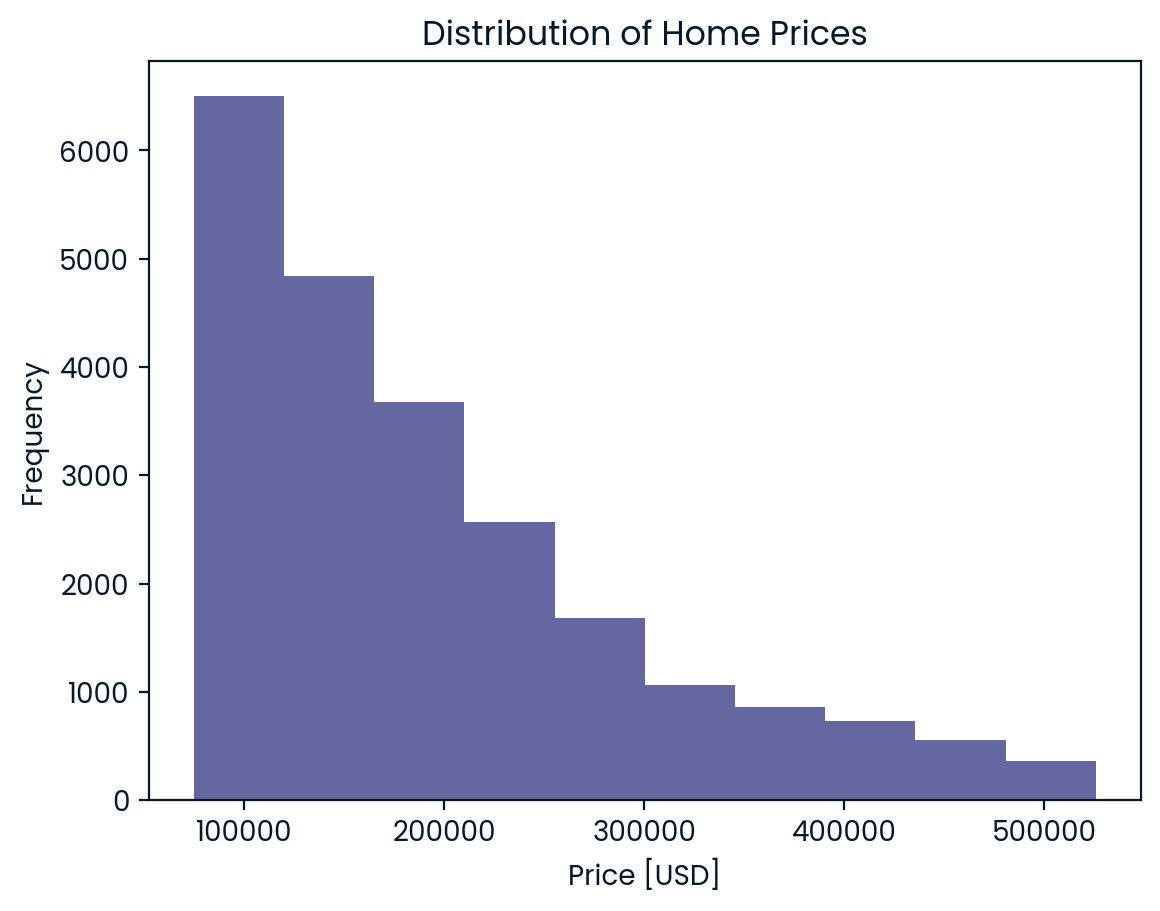

In [55]:
# Build histogram
plt.hist(df["price_usd"])
# Label axes
plt.xlabel("Price [USD]")
plt.ylabel("Frequency")
# Add title
plt.title("Distribution of Home Prices")
plt.show();

### **Task 1.5.13: Create a horizontal boxplot of "area_m2". Make sure that the x-axis has the label "Area [sq meters]" and the plot has the title "Distribution of Home Sizes". Use Matplotlib (plt).**

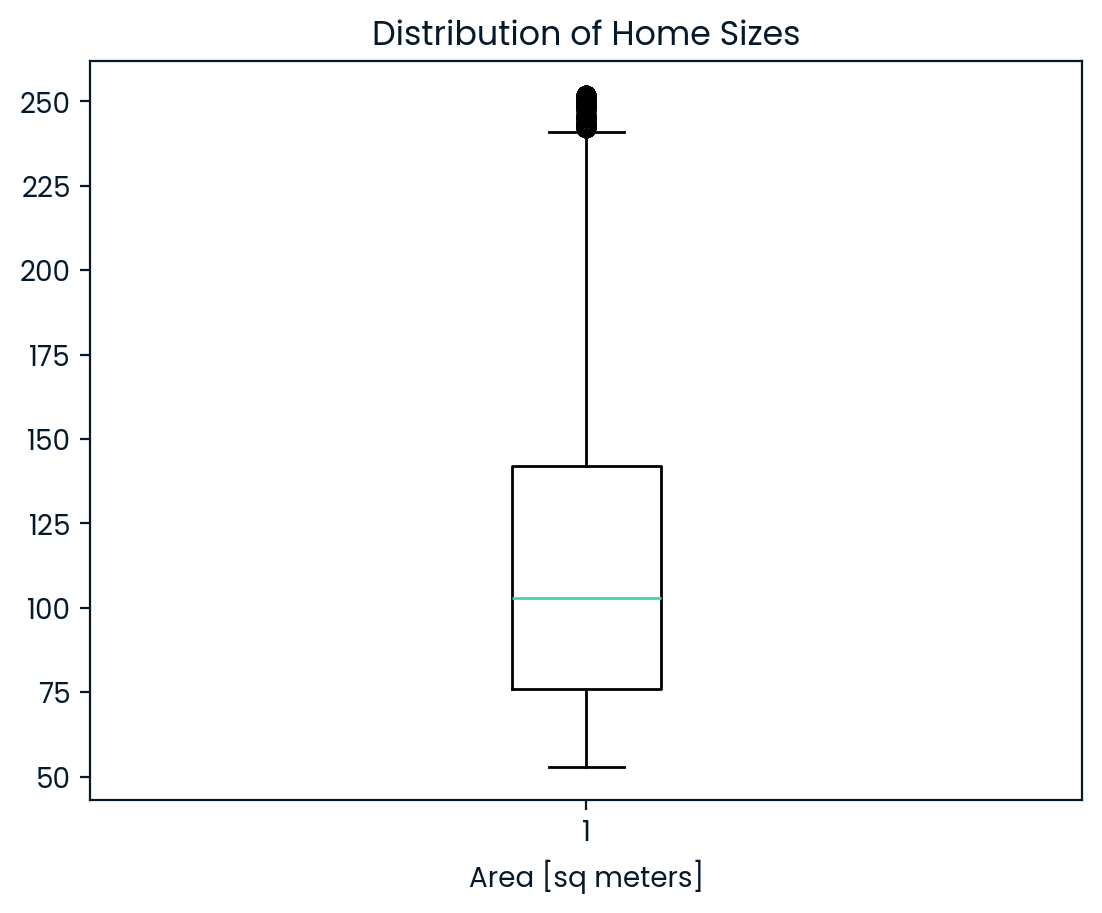

In [53]:
# Build box plot
plt.boxplot(df["area_m2"])
# Label x-axis
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Distribution of Home Sizes")
plt.show();

### **Task 1.5.14: Use the groupby method to create a Series named mean_price_by_region that shows the mean home price in each region in Brazil, sorted from smallest to largest.**

In [56]:
mean_price_by_region = df.groupby("region")["price_usd"].mean().sort_values(ascending=True)
mean_price_by_region

region
Central-West    178596.283663
North           181308.958207
Northeast       185422.985441
South           189012.345265
Southeast       208996.762778
Name: price_usd, dtype: float64

### **Task 1.5.15: Use mean_price_by_region to create a bar chart. Make sure you label the x-axis as "Region" and the y-axis as "Mean Price [USD]", and give the chart the title "Mean Home Price by Region". Use pandas.**

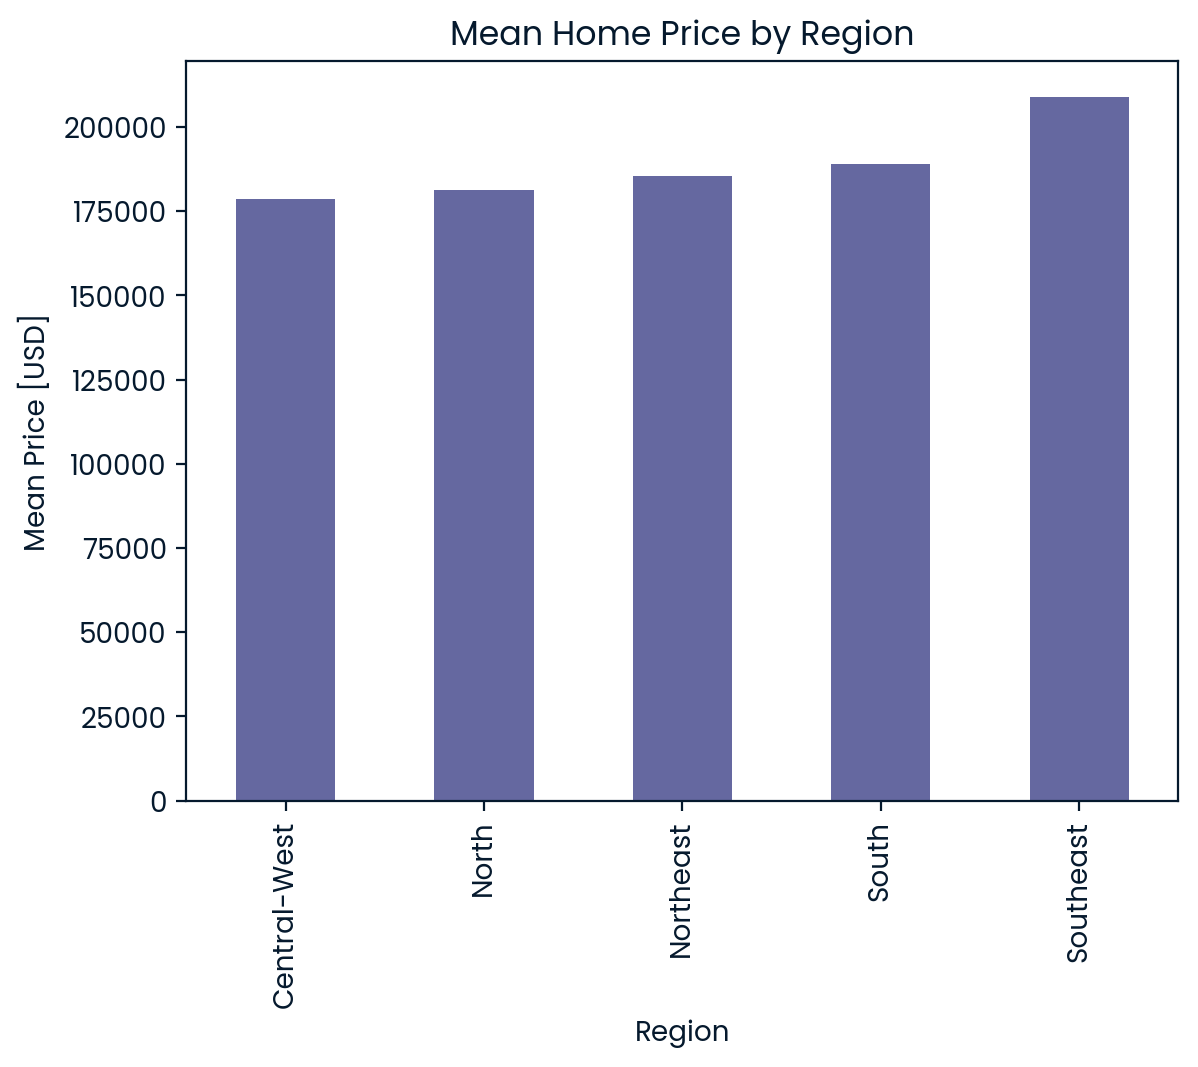

In [57]:
# Build bar chart, label axes, add title
mean_price_by_region.plot(
        kind="bar",
        x=mean_price_by_region.index,
        y=mean_price_by_region.values,
        xlabel="Region",
        ylabel="Mean Price [USD]",
        title="Mean Home Price by Region"
)
plt.show();

**You're now going to shift your focus to the southern region of Brazil, and look at the relationship between home size and price.**

### **Task 1.5.16: Create a DataFrame df_south that contains all the homes from df that are in the "South" region.**

In [58]:
df_south = df[df["region"] == "South"]
df_south.head()

,property_type,region,area_m2,price_usd,lat,lon,state,price_brl
9304,apartment,South,127.0,296448.85,-25.455704,-49.292918,Paraná,NaN
9305,apartment,South,104.0,219996.25,-25.455704,-49.292918,Paraná,NaN
9306,apartment,South,100.0,194210.50,-25.460236,-49.293812,Paraná,NaN
9307,apartment,South,77.0,149252.94,-25.460236,-49.293812,Paraná,NaN
9308,apartment,South,73.0,144167.75,-25.460236,-49.293812,Paraná,NaN


### **Task 1.5.17: Use the value_counts method to create a Series homes_by_state that contains the number of properties in each state in df_south.**

In [59]:
homes_by_state = df_south["state"].value_counts()
homes_by_state

state
Rio Grande do Sul    2643
Santa Catarina       2634
Paraná               2544
Name: count, dtype: int64

### **Task 1.5.18: Create a scatter plot showing price vs. area for the state in df_south that has the largest number of properties. Be sure to label the x-axis "Area [sq meters]" and the y-axis "Price [USD]"; and use the title "<name of state>: Price vs. Area". Use Matplotlib (plt).**

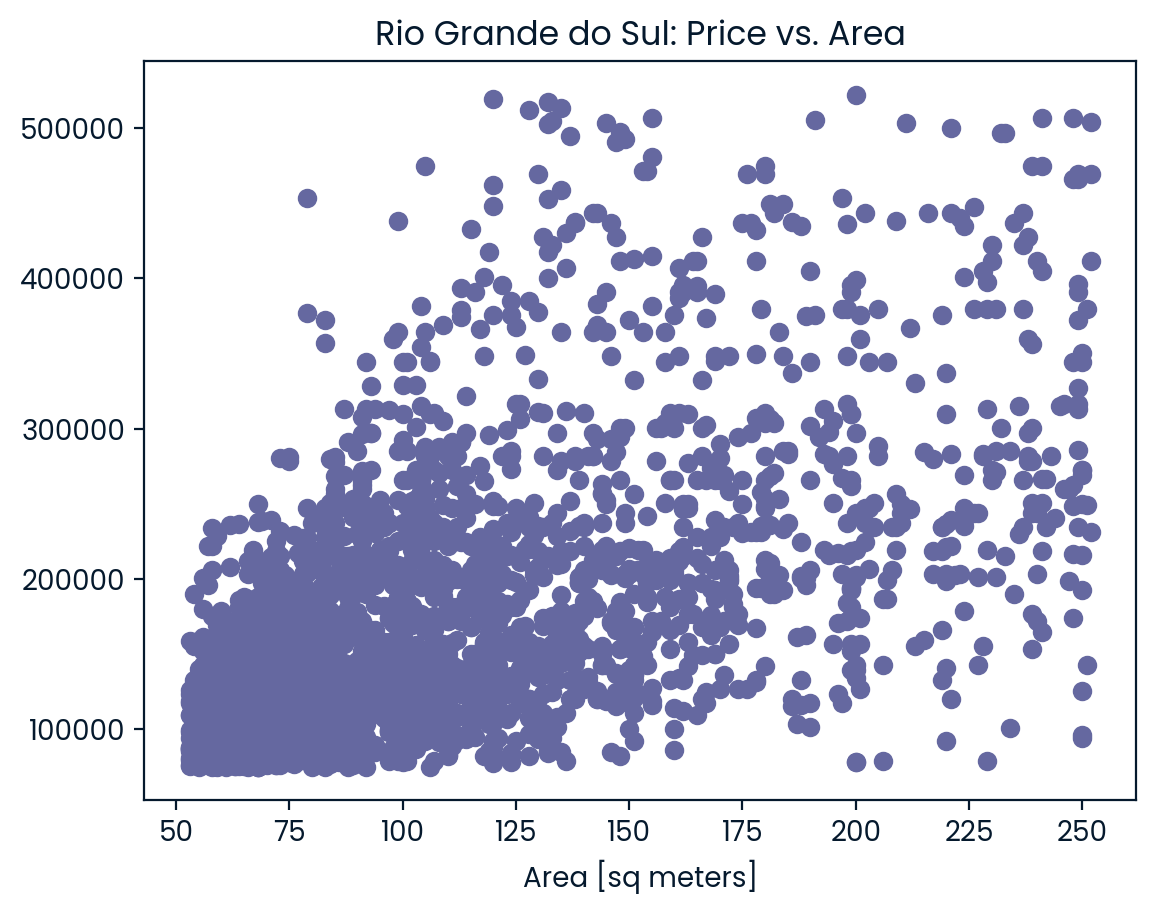

In [60]:
# Subset data
df_south_state = df_south["state"].value_counts().idxmax()
df_south_rgs = df_south[df_south["state"] == df_south_state]
# Build scatter plot
plt.scatter(x=df_south_rgs["area_m2"], y=df_south_rgs["price_usd"])
# Label axes
plt.xlabel("Area [sq meters]")
# Add title
plt.title("Rio Grande do Sul: Price vs. Area")
plt.show();

### **Task 1.5.19: Create a dictionary south_states_corr, where the keys are the names of the three states in the "South" region of Brazil, and their associated values are the correlation coefficient between "area_m2" and "price_usd" in that state.**

In [62]:
south_states_corr = {}
south_states = df_south["state"].unique()
for state in south_states:
    # Subset data for the current state
    state_data = df_south[df_south["state"] == state]
    
    # Calculate correlation coefficient between "area_m2" and "price_usd"
    correlation = state_data["area_m2"].corr(state_data["price_usd"])
    
    # Add state and correlation to the dictionary
    south_states_corr[state] = correlation
south_states_corr

{'Paraná': 0.5436659935502661,
 'Rio Grande do Sul': 0.5773267433717683,
 'Santa Catarina': 0.506812177636678}